In [1]:
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

img_width=150
img_height=150
batch_size=20

C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\usama\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
model=keras.applications.InceptionResNetV2(weights="imagenet",include_top=False,
input_shape=(img_height,	img_width,	3))
#	Freeze	all	lower	layers		
for	layer	in	model.layers:
    layer.trainable	=	False
    #	add	custom	layers	
x	=	model.output
x	=	keras.layers.Flatten()(x)
x	=	keras.layers.Dense(64,	activation="relu")(x)
x	=	keras.layers.Dropout(0.2)(x)

output	=	keras.layers.Dense(1,	activation="sigmoid")(x)
print(model.summary())	
model_final	=	keras.models.Model(inputs=model.input,	outputs=output)	
model_final.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
train_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	shear_range=0.2,		
zoom_range=0.2,	horizontal_flip=True)	
#	no	augmentation	for	testing:	rescaling	only	
valid_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)
test_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)	
	
#	a	generator	that	reads	images	found	in	'data/train',	and	generates	batches	of	augmented	image	data	
train_generator	=	train_datagen.flow_from_directory(	
								'./data/train',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	
#	this	is	a	similar	generator,	for	validation	data	
valid_generator	=	valid_datagen.flow_from_directory(	
								'./data/valid',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	


test_generator	=	test_datagen.flow_from_directory(	
						'./data/test',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,
shuffle=False,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	



Found 546 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [4]:
history	=model_final.fit_generator(	
train_generator,	
steps_per_epoch=2000	//	batch_size,	
								epochs=10,	
validation_data=valid_generator,	
validation_steps=2000	//	batch_size
)	

test_loss, test_acc=model_final.evaluate_generator(test_generator)

Epoch 1/10
100/100 [==============================] - 186s 2s/step - loss: 0.7688 - acc: 0.6471 - val_loss: 0.9871 - val_acc: 0.5005
Epoch 2/10
100/100 [==============================] - 170s 2s/step - loss: 0.5287 - acc: 0.7420 - val_loss: 2.5871 - val_acc: 0.4995
Epoch 3/10
100/100 [==============================] - 166s 2s/step - loss: 0.4780 - acc: 0.7672 - val_loss: 1.6519 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 160s 2s/step - loss: 0.4329 - acc: 0.7958 - val_loss: 1.5032 - val_acc: 0.4510
Epoch 5/10
100/100 [==============================] - 162s 2s/step - loss: 0.4465 - acc: 0.8184 - val_loss: 3.0999 - val_acc: 0.4845
Epoch 6/10
100/100 [==============================] - 162s 2s/step - loss: 0.4026 - acc: 0.8248 - val_loss: 1.8337 - val_acc: 0.4005
Epoch 7/10
100/100 [==============================] - 160s 2s/step - loss: 0.3724 - acc: 0.8364 - val_loss: 2.3675 - val_acc: 0.4010
Epoch 8/10
100/100 [==============================] - 161s 2s/step - 

In [5]:
print("[INFO] accuracy: {:.2f}%".format(test_acc * 100)) 
print("[INFO] Loss: ",test_loss)

[INFO] accuracy: 54.29%
[INFO] Loss:  1.5236360686165946


Text(0.5, 1, 'Accuracy and Loss vs Epoch Curves')

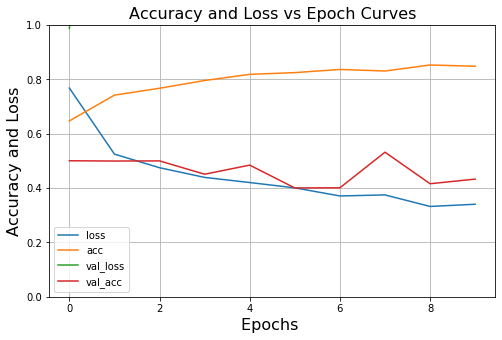

In [6]:
pd.DataFrame(history.history).plot(figsize=(8,5))	
plt.grid(True)	
plt.gca().set_ylim(0,1)	
plt.savefig('inceptionresnetv2')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy and Loss',fontsize=16)
plt.title('Accuracy and Loss vs Epoch Curves',fontsize=16)

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model_final.predict_generator(test_generator)
y_pred = np.rint(predictions)
y_true = test_generator.classes

In [8]:
confmat=confusion_matrix(y_true, y_pred)

In [9]:
print('Classification Report')
y_test=y_true
target_names=['COVID_NO','COVID_YES']
print(classification_report(y_test, y_pred, target_names=target_names))

ac= accuracy_score(y_test,y_pred)
print(ac)

Classification Report
              precision    recall  f1-score   support

    COVID_NO       0.53      0.66      0.59        70
   COVID_YES       0.56      0.43      0.48        70

    accuracy                           0.54       140
   macro avg       0.55      0.54      0.54       140
weighted avg       0.55      0.54      0.54       140

0.5428571428571428


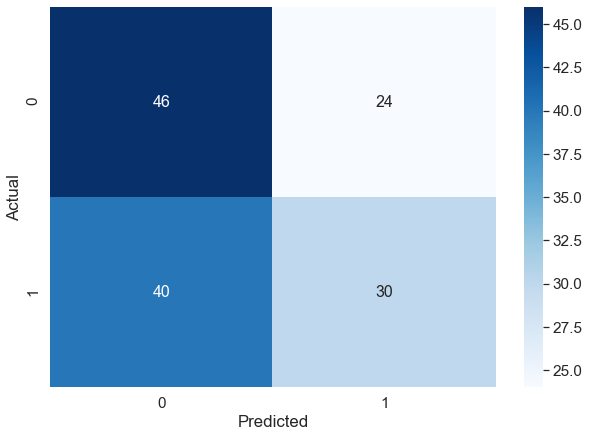

In [12]:
import seaborn as sn
cm=confmat
y_test=y_true
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,fmt='g',annot_kws={"size": 16})
plt.savefig('inceptionresnetv2_cf')#

In [11]:
model_final.save('inceptionresnetv2-trained-weights.h5')